# Live Example
This notebook collects data from the Raspberry Pi's core and onboard ring oscillator, and displays it in a live chart.

In [1]:
import time # for time stamp
import subprocess as sp # for using system commands and saving the result
import pandas as pd # for DataFrame tools
import numpy as np # for number tools
%matplotlib notebook
import matplotlib.pyplot as plt # for charting data

<IPython.core.display.Javascript object>


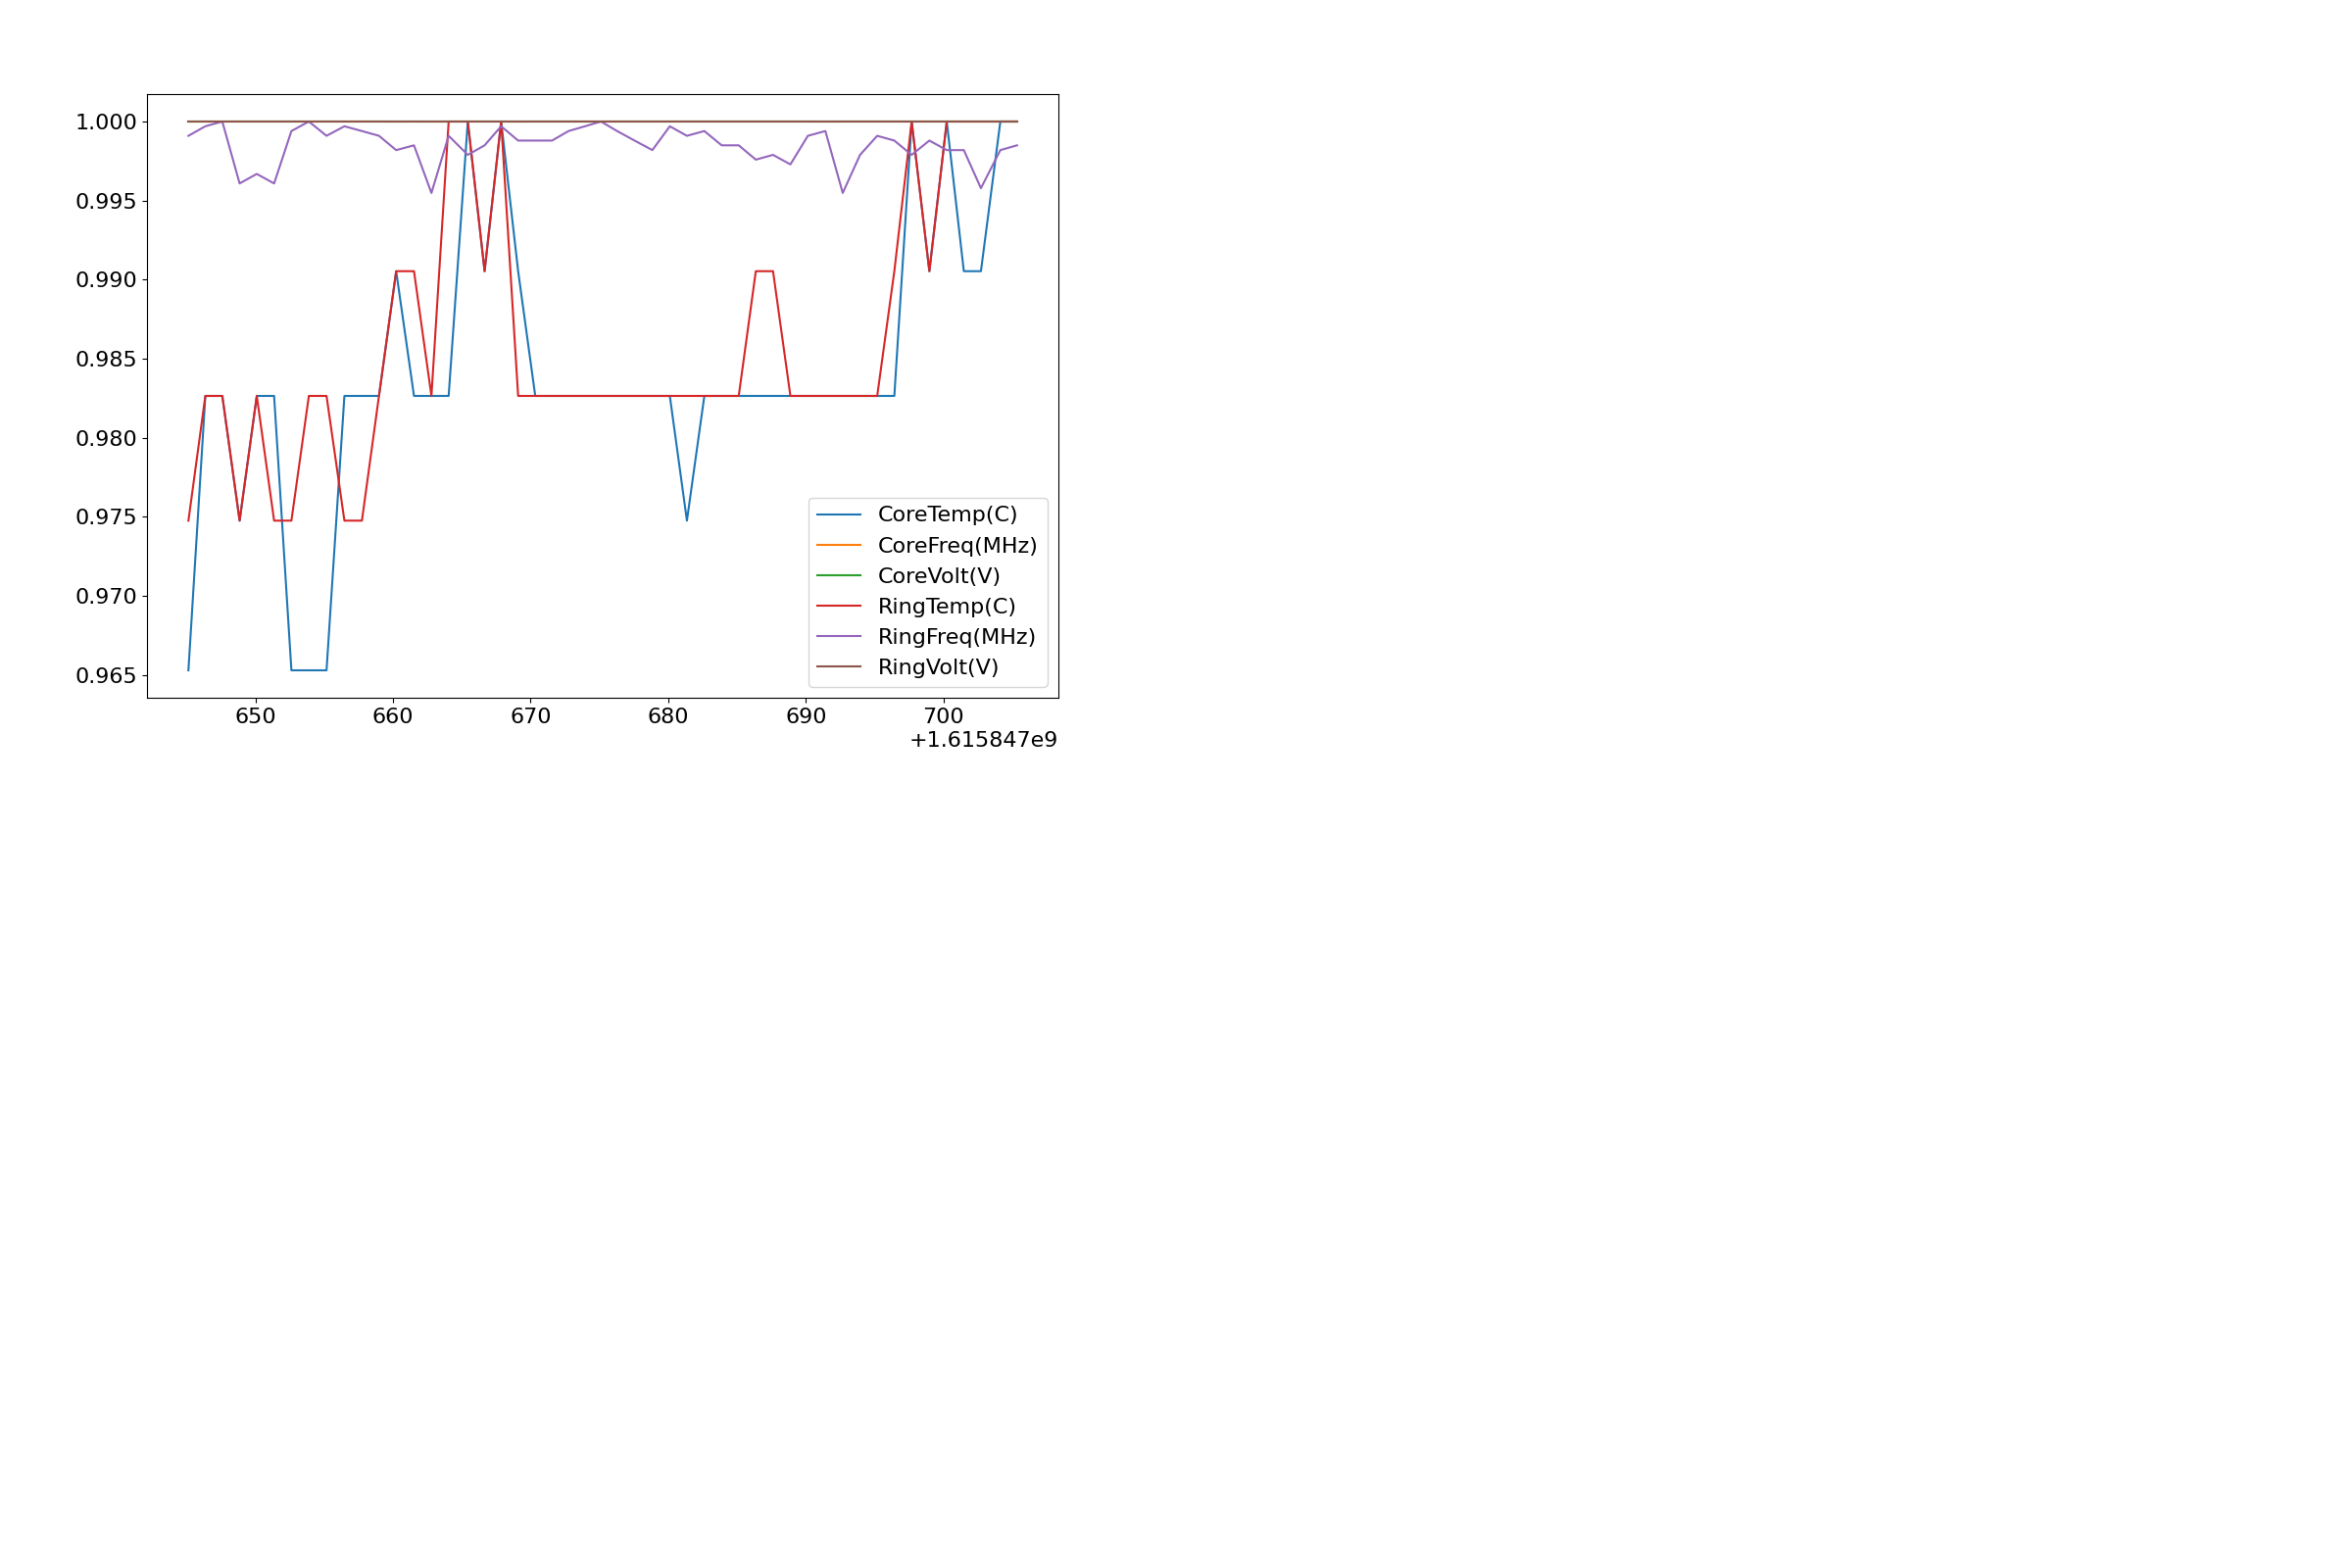

In [ ]:
# script setup
interval = 1 # loop interval in seconds
scale = 30 # number of samples shown, smaller is more "zoomed in"
width = 12 # width of chart
height = 8 # height of chart
text_size = 16 # size of chart text

# get data using subprocess package and vcgencmd
def get_data():
    core_t = float(sp.check_output(["vcgencmd","measure_temp"])[5:9])
    core_f = float(sp.check_output(["vcgencmd","measure_clock","core"])[13:22])/1000000
    core_v = float(sp.check_output(["vcgencmd","measure_volts","core"])[5:11])
    ring_t = str(sp.check_output(["vcgencmd","read_ring_osc"]))
    ring_f = float(ring_t.split('=')[1].split('M')[0])
    ring_v = float(ring_t.split('@')[1].split('V')[0])
    ring_t = float(ring_t[-10:].split('\'')[0])
    return [core_t,core_f,core_v,ring_t,ring_f,ring_v]

# convert each column to percentage
def normalize(df):
    df = df.copy(deep=True) # make a copy of the dataframe
    for c in df.columns:
        df[c] /= df[c].max()
    return df

# initialize dataframe
columns = ["CoreTemp(C)","CoreFreq(MHz)","CoreVolt(V)",
           "RingTemp(C)","RingFreq(MHz)","RingVolt(V)"]
t = time.time()
data = pd.DataFrame([get_data()],index = [t],columns = columns)

plt.rc("font",size=text_size)
fig, ax = plt.subplots(figsize=(width,height))
normalize(data).plot(ax=ax)
fig.canvas.draw()

def update():
    t = time.time()
    data.loc[t] = get_data()
    if(len(data) == scale):
        data.drop(index=data.index[0],axis=0,inplace=True)
    ax.clear()
    normalize(data).plot(ax=ax)
    fig.canvas.draw()
    elapsed = time.time() - t
    if elapsed < interval:
        time.sleep(interval - elapsed)

while True:
    update()